In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('./mnist_train.csv')
test = pd.read_csv('./mnist_test.csv', header=None)


In [325]:
matrix = df.as_matrix()[:10000]
print matrix.shape
m = matrix.shape[0]
y = matrix[:,0:1]
X = matrix[:,1:]


matrix_test = test.as_matrix()
X_test = matrix_test[:,1:]
m_test = X_test.shape[0]
y_test = matrix_test[:,0:1]


X, X_test = feature_normalize([X, X_test])

n = X.shape[1]

print X.shape
print y.shape

theta = np.random.rand(n,1)


(10000, 785)
(10000, 784)
(10000, 1)


In [311]:
X

array([[-0.42536497, -0.42536497, -0.42536497, ..., -0.42536497,
        -0.42536497, -0.42536497],
       [-0.42536497, -0.42536497, -0.42536497, ..., -0.42536497,
        -0.42536497, -0.42536497],
       [-0.42536497, -0.42536497, -0.42536497, ..., -0.42536497,
        -0.42536497, -0.42536497],
       ..., 
       [-0.42536497, -0.42536497, -0.42536497, ..., -0.42536497,
        -0.42536497, -0.42536497],
       [-0.42536497, -0.42536497, -0.42536497, ..., -0.42536497,
        -0.42536497, -0.42536497],
       [-0.42536497, -0.42536497, -0.42536497, ..., -0.42536497,
        -0.42536497, -0.42536497]])

In [4]:
def sigmoid(z):
  '''
  Compute sigmoid function
  '''
  return 1 / (1 + np.e ** -z)

def hypothesis(X, theta):
  return sigmoid(X.dot(theta))

def cost_function(X, y, theta, lmbda=0):
  '''
  Computes Logistical cost function, return Cost, Gradient
  '''
  m = X.shape[0]
  h = hypothesis(X, theta)
  part_1 = y * (np.log(h))
  part_2 = (1 - y) * (np.log(1.001-h))
  reg = lmbda/(2.0*m) * (theta[1:] **  2).sum()
  constant = -1.0/m
  combined = (part_1 + part_2).sum() + reg
  return constant * (combined)

def feature_normalize(X):
    mean = np.mean(X)
    std = np.std(X, ddof=1)
    return ( X - mean ) / std

def featureNormalize(X):
  '''
  Returns a normalized version of X where
  the mean value of each feature is 0 and the standard deviation
  is 1. This is often a good preprocessing step to do when
  working with learning algorithms.
  '''
  
  mean = np.mean(X, axis=0)
  std = np.std(X, axis=0, ddof=1)
  return (X - mean)/std

def gradient_descent(X, y, theta, alpha, num_iters, lmbda=0):
  m = y.size
  n = theta.size
  J_history = np.zeros(shape=(num_iters, 1))
  
  constant = alpha*(1.0/m) 
  for i in range(num_iters):



    h = hypothesis(X, theta)
    error = (h - y)
    r = error * X
    rr = constant * r.sum(axis=0)
    rr = np.reshape(rr,(n,1))
#     print 'rr', rr[195:205]
    # TODO check reg
    theta = theta - rr
    reg = (lmbda/m) * theta[1:]
    theta[1:] = theta[1:] - reg

    cost = cost_function(X, y, theta)
    J_history[i,0] = cost

#     gradient_approx = gradient_checking(theta)
#     print gradient_approx
#     print cost

    
  return theta, J_history



In [101]:

def gradient_checking(theta, epsilon=0.00001):
#     print theta.shape
    n = theta.shape[0]
    gradient_approx = np.zeros(shape=(n,1))
#     for i in range(5):
#         print i
    for i in range(n):
#         print i
        theta_plus = theta.copy()
        theta_minus = theta.copy()
        theta_plus[i] = theta_plus[i] + epsilon
        theta_minus[i] -= epsilon

        cost_plus = cost_function(X, y, theta_plus)
        cost_minus = cost_function(X, y, theta_minus)
        cost = (cost_plus - cost_minus) / (2 * epsilon)
        gradient_approx[i] = cost
    return gradient_approx
    
#         print cost_plus
#         print cost_minus
    
# grad_approx = gradient_checking(theta)
# print np.concatenate((theta, grad_approx), axis=1)


In [151]:

# categories = [0,1,2,3,4,5,6,7,8,9]
categories = [0]

thetas = []
for k in categories:
    y1s = y == k
    y1 = np.zeros(shape=(m,1))
    y1[y1s] = 1

#     print theta
    new_theta, history = gradient_descent(X, y1, theta, 0.05, 1)
#     print history
#     print gradient_approx.shape
#     print np.concatenate((history, gradient_approx), axis=1)
    thetas.append(new_theta)
    print 'done', k


rr [[-0.00618266]
 [-0.00619273]
 [-0.00619042]
 [-0.00619097]
 [-0.00595109]
 [-0.00528232]
 [-0.00406816]
 [-0.00202235]
 [ 0.00093101]
 [ 0.00529017]]
done 0


In [38]:
predictions = []
for t in thetas:
#     print t.shape
    predicted = hypothesis(X_test, t)
    predictions.append(predicted)
    
predicted_table = np.concatenate(tuple(predictions), axis=1)
predicted_table = np.argmax(predicted_table, axis=1)
predicted_table = np.reshape(predicted_table, (m_test,1))
correct = (predicted_table == y_test).sum()
print float(correct) / m

0.7741


In [152]:
print theta[195:206]
i = 195
epsilon = 0.001
theta_plus = theta.copy()
theta_minus = theta.copy()
print theta[i]
theta_plus[i] = theta_plus[i] + epsilon
theta_minus[i] -= epsilon

cost_normal = cost_function(X, y, theta)
cost_plus = cost_function(X, y, theta_plus)
cost_minus = cost_function(X, y, theta_minus)
print cost_normal
print cost_plus
print cost_minus
cost = (cost_plus - cost_minus) / (2.0 * epsilon)
print cost
# gradient_approx[i] = cost

[[ 0.71850475]
 [ 0.83616732]
 [ 0.76309147]
 [ 0.10663269]
 [ 0.29033147]
 [ 0.24685244]
 [ 0.50240365]
 [ 0.96120994]
 [ 0.04775195]
 [ 0.67190725]
 [ 0.71772218]]
[ 0.71850475]
101.479990379
101.481255065
101.478725699
1.2646831047


### Mnist2
https://gist.github.com/awjuliani/5ce098b4b76244b7a9e3#file-softmax-ipynb

In [312]:
import matplotlib.pyplot as plt
%matplotlib inline
import scipy
import scipy.sparse
import numpy as np

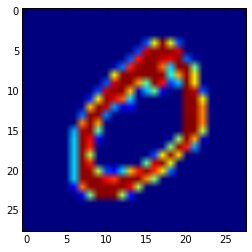

In [313]:
# X[0]
plt.imshow(np.reshape(X[0], [28,28]))

In [44]:
def oneHotIt(Y):
    m = Y.shape[0]
    #Y = Y[:,0]
#     print m
    OHX = scipy.sparse.csr_matrix((np.ones(m), (Y, np.array(range(m)))))
    print OHX.toarray().shape
    OHX = np.array(OHX.todense()).T
    return OHX

In [322]:
def to_one_hot(y):
    K = len(np.unique(y.ravel()))
    one_hot = np.zeros(shape=(m, K))
    for i, row in enumerate(one_hot):
        if i < 10:
            idx = y[i][0]
            row[idx] = 1
    return one_hot

def softmax(z):
    z -= np.max(z)
    sm = (np.exp(z).T / np.sum(np.exp(z), axis=1)).T
    return sm

_nan_prob = None
_nan_y_mat = None
_nan_scores = None
_nan_X = None
_nan_theta = None
def get_loss(X, y, theta, lam=1):
    m = X.shape[0]
    y_mat = to_one_hot(y)
    scores = np.dot(X, theta)
#     print 'scores', scores

    prob = softmax(scores)
    
#     if math.isnan(prob[0][0]):
#         print 'prob[0][0] was NaN'
#         print 'scores', scores
#         return 'nan', 'nan'
    
#     print 'prob', prob
    
    s1 = np.sum(y_mat * np.log(prob))
    if math.isnan(s1):
        global _nan_prob
        global _nan_y_mat
        global _nan_scores
        global _nan_X
        global _nan_theta
        _nan_prob = prob
        _nan_y_mat = y_mat
        _nan_scores = scores
        _nan_X = X
        _nan_theta = theta
        
#     print 's1', s1
    s2 = np.sum(theta ** 2)
#     print 's2', s2
    loss = (-1 / m) * s1 + (lam/2) * s2
    
#     print 'loss', loss
    grad = (-1 / m) * np.dot(X.T,(y_mat - prob)) + lam * theta
#     print 'grad', grad
#     zcores = X.dot(theta)
    return loss, grad
    
def get_probs_and_preds(X, theta):
#     print X, theta
    probs = softmax(np.dot(X, theta))
#     print probs
    preds = np.argmax(probs, axis=1)
    return probs, preds

In [315]:
%%time
to_one_hot(y)

CPU times: user 2.5 ms, sys: 3 µs, total: 2.5 ms
Wall time: 2.51 ms


array([[ 1.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  1.,  0., ...,  0.,  0.,  0.],
       ..., 
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.]])

In [331]:
# theta = np.zeros([X.shape[1],len(np.unique(y))])
theta = np.random.rand(X.shape[1],len(np.unique(y)))
# print theta

# loss, grad = get_loss(X, y, theta)
# print loss
# print grad

7 * 7


49

In [333]:
# theta = np.zeros([X.shape[1],len(np.unique(y))])
iterations = 100
learning_rage = 1e-5
losses = []
for i in range(0,iterations):

    if math.isnan(theta[0][0]):
        print 'theta[0][0] was NaN'
        print 'i', i
        break
    
    loss, grad = get_loss(X, y, theta)
    losses.append(loss)
#     print theta
    
    theta = theta - (learning_rage * grad)
#     if i % 50 == 0:
#         print 'doing', i
#         print theta
#         print grad
    
    
# print loss
print theta

theta[0][0] was NaN
i 92
[[ nan  nan  nan ...,  nan  nan  nan]
 [ nan  nan  nan ...,  nan  nan  nan]
 [ nan  nan  nan ...,  nan  nan  nan]
 ..., 
 [ nan  nan  nan ...,  nan  nan  nan]
 [ nan  nan  nan ...,  nan  nan  nan]
 [ nan  nan  nan ...,  nan  nan  nan]]


In [317]:
# print theta
# import math

# print _nan_prob[4199:4210]
# print _nan_y_mat

# s1 = np.sum(y_mat * np.log(prob))

# print '_nan_prob', _nan_prob
# print '_nan_y_mat', _nan_y_mat
# print '_nan_scores', _nan_scores
# print '_nan_X', _nan_X
# print '_nan_theta', _nan_theta

#     z -= np.max(z)
#     sm = (np.exp(z).T / np.sum(np.exp(z), axis=1)).T


# print _nan_scores.sum()
print _nan_scores[4200]
# print np.max(_nan_scores[4200])


# print np.exp(_nan_scores[4200])
print softmax(_nan_scores)[4200]


[-45948.121406 -45929.125556 -45953.137896 -45884.445336 -45941.189096
 -46014.520296 -46014.520296 -46014.520296 -46014.520296 -45966.499066]
[ nan  nan  nan  nan  nan  nan  nan  nan  nan  nan]


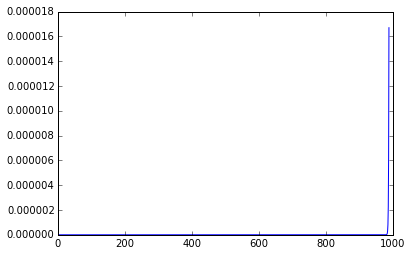

In [334]:
# print np.exp(-740.25999525)
# np.arange(-10,10,0.1)
plt.plot(np.exp(np.arange(-1000,-10,1)))

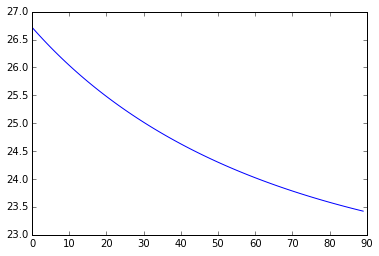

In [335]:
plt.plot(losses)


In [336]:
def get_accuracy(X, y, theta):
    prob, pred = get_probs_and_preds(X, theta)
    print pred[10:20]
#     print pred
#     print sum(pred == y.ravel())
    accuracy = sum(pred == y.ravel())/(float(len(y)))
    return accuracy

print y.ravel()[10:20]
get_accuracy(X,y, theta)
    

[5 3 6 1 7 2 8 6 9 4]
[0 0 0 0 0 0 0 0 0 0]


0.10009999999999999

In [100]:
print theta

[[ 1.02138421  0.44198852  0.87302001 ...,  1.12247988  1.35112885
   0.53241122]
 [ 0.91866282  0.53445533  1.30818102 ...,  1.25548835  1.08384943
   1.15645055]
 [ 1.05846029  0.86050958  1.07412139 ...,  0.67057408  0.91223494
   1.14313093]
 ..., 
 [ 1.02979219  0.98809221  0.63076443 ...,  0.94966453  0.76180241
   1.21304107]
 [ 0.66008765  0.76152277  0.65499051 ...,  0.79195124  0.58837725
   1.04191476]
 [ 0.81272896  1.31993316  0.86592854 ...,  1.09034432  0.4799567
   1.18574185]]


In [206]:

# asdf
def aaa():
    global asdf
    asdf = 'asdffff'

aaa()
print asdf
    

asdffff
